In [1]:
#install.packages("forecast")
library(forecast)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [2]:
 gdp <- read.csv("../input/gdpq.csv", header = TRUE)
 gdp_o <- ts(gdp[,1]/1000, start=1970, frequency=4)
 gdp_sa <- ts(gdp[,2]/1000, start=1970, frequency=4)
 gdp_gr <- ts((gdp_sa-lag(gdp_sa,-1))/lag(gdp_sa,-1)*100,  start=c(1970,2), frequency=4)

Series: window(gdp_o, end = 2008 + 11/12) 
ARIMA(2,1,3)(0,1,1)[4] 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1     ar2      ma1      ma2      ma3     sma1
      -0.1169  0.7681  -0.0449  -0.6995  -0.1288  -0.6025
s.e.   0.0975  0.0940   0.1231   0.0868   0.0894   0.0819

sigma^2 estimated as 0.0006206:  log likelihood=345.21
AIC=-676.43   AICc=-675.65   BIC=-655.31

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.4414257 2.529497 1.482158 -0.3091239 1.681684 0.2228994
                  ACF1
Training set 0.1799715


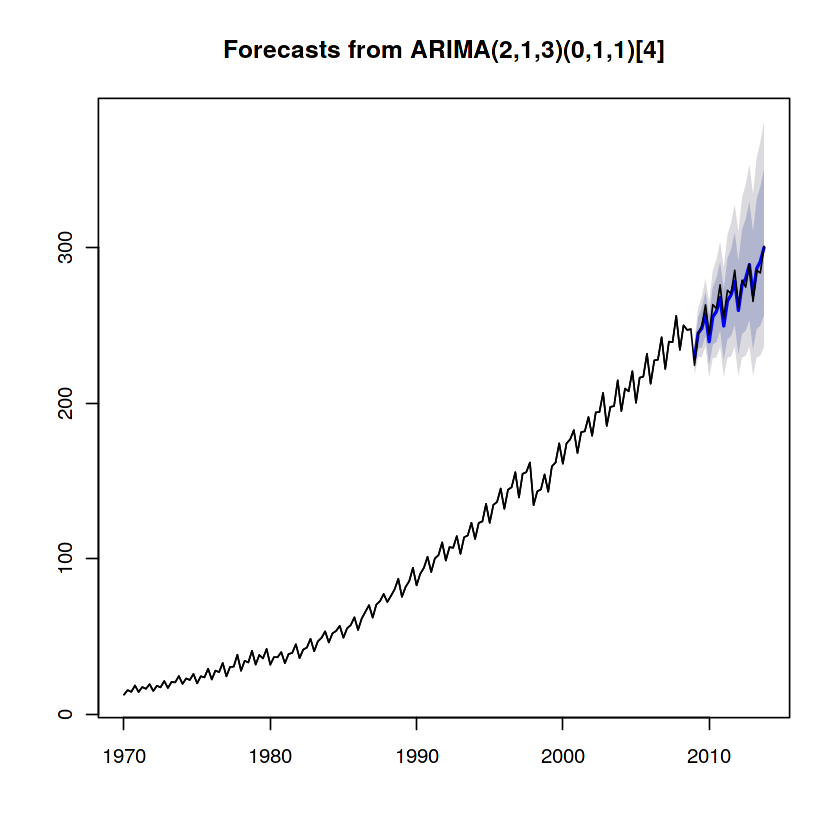

In [3]:
# Fit model 
gdp.model <- Arima(window(gdp_o,end=2008+11/12),order=c(2,1,3),
                   seasonal=list(order=c(0,1,1),period=4),lambda=0)
summary(gdp.model)
plot(forecast(gdp.model,h=20))
lines(gdp_o)

In [4]:
# Apply fitted model to later data
gdp.model2 <- Arima(window(gdp_o,start=2009),model=gdp.model)

# Forecast accuracy measures on the log scale.
# in-sample one-step forecasts.
accuracy(gdp.model)
# out-of-sample one-step forecasts.
accuracy(gdp.model2)
# out-of-sample multi-step forecasts
accuracy(forecast(gdp.model,h=20,lambda=NULL), window(gdp_o,start=2009))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.4414257,2.529497,1.482158,-0.3091239,1.681684,0.2228994,0.1799715


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.621668,2.525689,1.891291,-0.604144,0.7093538,0.1974877,0.1874104


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.4414257,2.529497,1.482158,-0.3091239,1.681684,0.2228994,0.1799715,NA
Test set,261.7426900,262.340457,261.742690,97.9047380,97.904738,39.3630742,0.3683616,16.22648
